# Анализ системы метрик приложения

Исполнитель: Хазанов Михаил

Дата: 12.07.2025

Вы — продуктовый аналитик приложения Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, вводная часть имеется

## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо, что все импорты собраны в первой ячейке кода, это соответствует оформлению кода РЕР8 и помогает понять, какое окружение используется в проекте.

In [2]:
visits = pd.read_csv('...')
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)

In [3]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB


In [5]:
visits.duplicated().sum()

0

In [6]:
orders = pd.read_csv('https://...')
orders.columns = ['user_id', 'event_dt', 'revenue']
orders.event_dt = pd.to_datetime(orders.event_dt)

In [7]:
orders.head()

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 794.5 KB


In [9]:
orders.duplicated().sum()

0

In [10]:
mk_costs = pd.read_csv('...')
mk_costs.columns = ['dt', 'channel', 'costs']
mk_costs.dt = pd.to_datetime(mk_costs.dt)

In [11]:
mk_costs.head()

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


In [12]:
mk_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.0+ KB


In [13]:
mk_costs.duplicated().sum()

0


Данные загружены, пропусков и дубликатов в датасетах нет.

## Подготовка данных к когортному анализу

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [14]:
# Добавляем сортировку по session_start
visits = visits.sort_values(by='session_start')

# Определяем дату первой сессии и канал привлечения для каждого пользователя
profiles = visits.groupby('user_id').agg(
    first_dt=('session_start', 'min'),
    first_channel=('channel', 'first')
).reset_index()

# Приводим дату первой сессии к нужному формату (только дата, без времени)
profiles['first_dt'] = profiles['first_dt'].dt.date
profiles['first_dt'] = pd.to_datetime(profiles['first_dt']) # приводим к datetime для последующих операций

    
<div class="alert alert-info"> <b>Комментарии студента V1:</b> Поправил по твоему образцу.</div>

In [15]:
# Рассчитываем CAC по каналам и датам.  Группируем и суммируем затраты.
daily_costs = mk_costs.groupby(['dt', 'channel'])['costs'].sum().reset_index()
daily_costs['dt'] = pd.to_datetime(daily_costs['dt'])  # Убеждаемся, что dt имеет тип datetime

# Считаем количество пользователей, привлеченных по каждому каналу в день
user_counts_by_channel = visits.groupby([profiles['first_dt'], profiles['first_channel']])['user_id'].nunique().reset_index()
user_counts_by_channel.rename(columns={'user_id': 'users_count', 'first_dt':'dt', 'first_channel':'channel'}, inplace=True)
user_counts_by_channel['dt'] = pd.to_datetime(user_counts_by_channel['dt'])

In [16]:
# Объединяем данные о стоимости привлечения с данными о профилях пользователей, по дате и каналу.
profiles = pd.merge(profiles, user_counts_by_channel, left_on=['first_dt', 'first_channel'], right_on=['dt', 'channel'], how='left')
profiles = profiles.merge(daily_costs, on=['dt', 'channel'], how='left')

# Добавляем столбец САС
profiles['cac'] = profiles['costs'] / profiles['users_count']

profiles = profiles.fillna(0)

profiles.head()

,user_id,first_dt,first_channel,dt,channel,users_count,costs,cac
0,26034876,2024-05-29,FaceBoom,2024-05-29,FaceBoom,90,85.792484,0.953250
1,69890364,2024-06-28,RocketSuperAds,2024-06-28,RocketSuperAds,60,36.295000,0.604917
2,75610104,2024-06-09,FaceBoom,2024-06-09,FaceBoom,101,120.812103,1.196159
3,76692397,2024-10-21,FaceBoom,2024-10-21,FaceBoom,120,138.903998,1.157533
4,80224421,2024-06-21,FaceBoom,2024-06-21,FaceBoom,123,148.704623,1.208981


In [17]:
# Добавление информации в visits и orders и расчет lifetime

# Добавляем информацию о дате привлечения в таблицы visits и orders
visits = pd.merge(visits, profiles[['user_id', 'first_dt', 'first_channel']], on='user_id', how='left')
orders = pd.merge(orders, profiles[['user_id', 'first_dt', 'first_channel']], on='user_id', how='left')

# Рассчитываем лайфтайм (в днях)
visits['first_dt'] = pd.to_datetime(visits['first_dt'])
orders['first_dt'] = pd.to_datetime(orders['first_dt'])

visits['lifetime'] = (visits['session_start'] - visits['first_dt']).dt.days
orders['lifetime'] = (orders['event_dt'] - orders['first_dt']).dt.days



In [18]:
visits.head()

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,lifetime
0,767410614400,India,mobile,MediaTornado,2024-04-01 00:07:00,2024-04-01 01:07:00,2024-04-01,MediaTornado,0
1,641772204272,India,mobile,MediaTornado,2024-04-01 00:09:00,2024-04-01 00:22:00,2024-04-01,MediaTornado,0
2,934895210751,India,mobile,RocketSuperAds,2024-04-01 00:23:00,2024-04-01 00:49:00,2024-04-01,RocketSuperAds,0
3,226472994774,India,tv,FaceBoom,2024-04-01 00:31:00,2024-04-01 00:53:00,2024-04-01,FaceBoom,0
4,686701513307,India,desktop,MediaTornado,2024-04-01 00:35:00,2024-04-01 00:46:00,2024-04-01,MediaTornado,0


In [19]:
orders.head()

,user_id,event_dt,revenue,first_dt,first_channel,lifetime
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01,FaceBoom,0
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01,FaceBoom,0
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01,FaceBoom,0
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01,TipTop,0
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01,FaceBoom,0


## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

In [20]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

# 1. Рассчитываем DAU
dau = visits.groupby(visits['session_start'].dt.date)['user_id'].nunique().reset_index()
dau.columns = ['date', 'dau']
dau['date'] = pd.to_datetime(dau['date'])

# 2. Рассчитываем MAU
mau = visits.groupby(visits['session_start'].dt.to_period('M'))['user_id'].nunique().reset_index()
mau.columns = ['month', 'mau']
mau['month'] = mau['month'].dt.to_timestamp()

In [21]:
dau.head()

,date,dau
0,2024-04-01,356
1,2024-04-02,410
2,2024-04-03,481
3,2024-04-04,472
4,2024-04-05,533


In [22]:
mau.head()

,month,mau
0,2024-04-01,9069
1,2024-05-01,10849
2,2024-06-01,10240
3,2024-07-01,10864
4,2024-08-01,11977


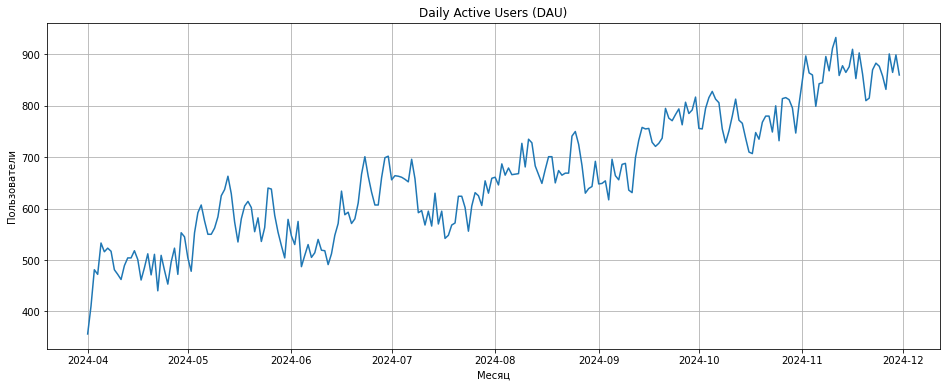

In [23]:
# --- Визуализация ---
plt.figure(figsize=(16, 6))

# DAU

plt.plot(dau['date'], dau['dau'])
plt.title('Daily Active Users (DAU)')
plt.xlabel('Месяц')
plt.ylabel('Пользователи')
plt.grid()
plt.show()


Видно, что по количеству ежедневно активных пользователей идет рост примерно от 350 человек в апреле до 850-900 в ноябре-декабре. Линия не полностью прямая, но тренд на рост очевидно просматривается.

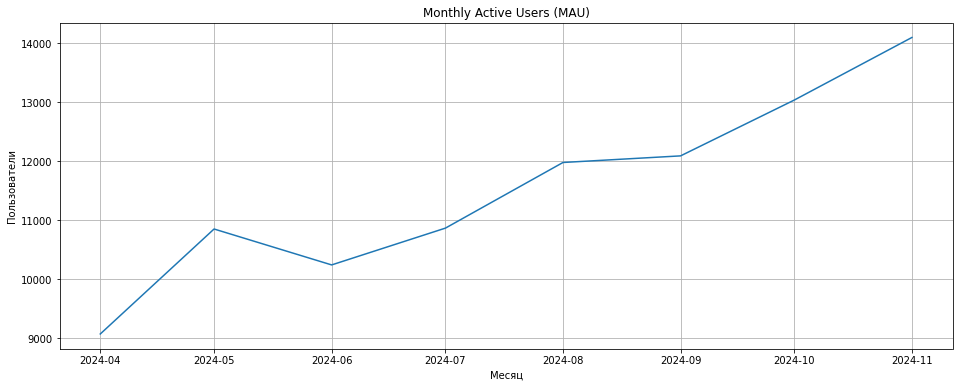

In [24]:
plt.figure(figsize=(16, 6))

# MAU

plt.plot(mau['month'], mau['mau'])
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Месяц')
plt.ylabel('Пользователи')
plt.grid()
plt.show()

Среди ежемесячно активных пользователей также видим тренд к росту с апреля по декабрь, с 9000 в апреле до 14000 в декабре.

In [25]:
# 3.  Рассчитываем среднемесячный DAU
monthly_dau = dau.groupby(dau['date'].dt.to_period('M'))['dau'].mean().reset_index()
monthly_dau.columns = ['month', 'avg_dau']
monthly_dau['month'] = monthly_dau['month'].dt.to_timestamp()

# Объединяем DAU и MAU для оформления stickiness
stickiness_data = pd.merge(monthly_dau, mau, on='month', how='left')
stickiness_data['stickiness'] = (stickiness_data['avg_dau'] / stickiness_data['mau']) * 100


In [26]:
stickiness_data.head()

,month,avg_dau,mau,stickiness
0,2024-04-01,488.333333,9069,5.384644
1,2024-05-01,576.967742,10849,5.318165
2,2024-06-01,580.366667,10240,5.667643
3,2024-07-01,615.000000,10864,5.660898
4,2024-08-01,681.193548,11977,5.687514


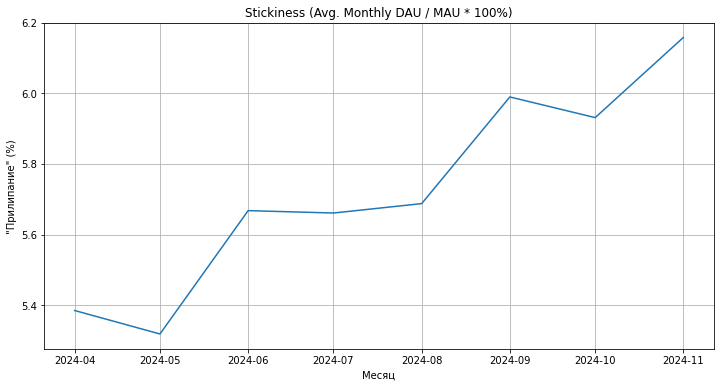

In [27]:
# 4. Объединяем MAU и среднемесячный DAU для расчета stickiness
stickiness_data = pd.merge(monthly_dau, mau, on='month', how='left')
stickiness_data['stickiness'] = (stickiness_data['avg_dau'] / stickiness_data['mau']) * 100

# --- Визуализация ---
plt.figure(figsize=(12, 6))
plt.plot(stickiness_data['month'], stickiness_data['stickiness'])
plt.title('Stickiness (Avg. Monthly DAU / MAU * 100%)')
plt.xlabel('Месяц')
plt.ylabel('"Прилипание" (%)')
plt.grid(True)
plt.show()

В "stickiness", то есть какую долю от месячной аудитории составляет в среднем дневная аудитория, также видим рост с апреля по ноябрь с 5.4% до 6.2%.

In [28]:
profiles['first_dt'] = pd.to_datetime(profiles['first_dt'])

# Фильтруем profiles, чтобы исключить ноябрь
profiles = profiles[profiles['first_dt'] <= pd.to_datetime('2024-10-31')] # Оставляем только октябрь и ранее

# 1. Рассчитываем CAC по месяцам привлечения
cac_by_month = profiles.groupby(profiles['first_dt'].dt.to_period('M'))['cac'].mean().reset_index()
cac_by_month.columns = ['month', 'cac']
cac_by_month['month'] = cac_by_month['month'].dt.to_timestamp()

In [29]:
# 2. Рассчитываем LTV и ROI (28 дней)
def calculate_ltv_roi(orders, profiles, cac_by_month):
    # Фильтруем заказы, чтобы убрать ноябрь
    profiles = profiles[profiles['first_dt'] <= pd.to_datetime('2024-10-31')]

    # Фильтруем заказы, совершенные в течение 28 дней
    cohort_data = orders[orders['lifetime'] <= 28]

    # Группируем по месяцу первого действия (first_dt) и считаем сумму заказов
    cohort_revenue = cohort_data.groupby(cohort_data['first_dt'].dt.to_period('M'))['revenue'].sum().reset_index()
    cohort_revenue.columns = ['month', 'revenue']
    cohort_revenue['month'] = cohort_revenue['month'].dt.to_timestamp() # Преобразуем Period в Timestamp

    # Группируем profiles по месяцу первого действия и считаем количество уникальных пользователей
    cohort_users = profiles.groupby(profiles['first_dt'].dt.to_period('M'))['user_id'].nunique().reset_index()
    cohort_users.columns = ['month', 'num_users']
    cohort_users['month'] = cohort_users['month'].dt.to_timestamp() # Преобразуем Period в Timestamp


    # Объединяем CAC, revenue и кол-во пользователей
    cohort_metrics = pd.merge(cac_by_month, cohort_revenue, on='month', how='left')
    cohort_metrics = pd.merge(cohort_metrics, cohort_users, on='month', how='left')


    cohort_metrics['revenue'] = cohort_metrics['revenue'].fillna(0) # Заполняем NaN нулями, если выручки нет
    cohort_metrics['num_users'] = cohort_metrics['num_users'].fillna(0) # Заполняем NaN нулями, если нет пользователей
    cohort_metrics['cac'] = cohort_metrics['cac'].fillna(0)

    # Рассчитываем LTV и ROI
    cohort_metrics['ltv'] = cohort_metrics['revenue'] / cohort_metrics['num_users']
    cohort_metrics['roi'] = (cohort_metrics['ltv'] - cohort_metrics['cac']) / cohort_metrics['cac']
    cohort_metrics.replace([float('inf'), float('-inf')], 0, inplace=True) # Заменяем inf на 0


    return cohort_metrics


cohort_metrics = calculate_ltv_roi(orders, profiles, cac_by_month)


# Вывод таблицы с метриками
cohort_metrics.head()

,month,cac,revenue,num_users,ltv,roi
0,2024-04-01,0.736432,7535.30,9069,0.830885,0.128258
1,2024-05-01,0.750692,8246.98,9789,0.842474,0.122264
2,2024-06-01,0.976025,7524.10,8719,0.862954,-0.115848
3,2024-07-01,1.056661,10115.59,8742,1.157125,0.095077
4,2024-08-01,1.157630,10508.12,9518,1.104026,-0.046305


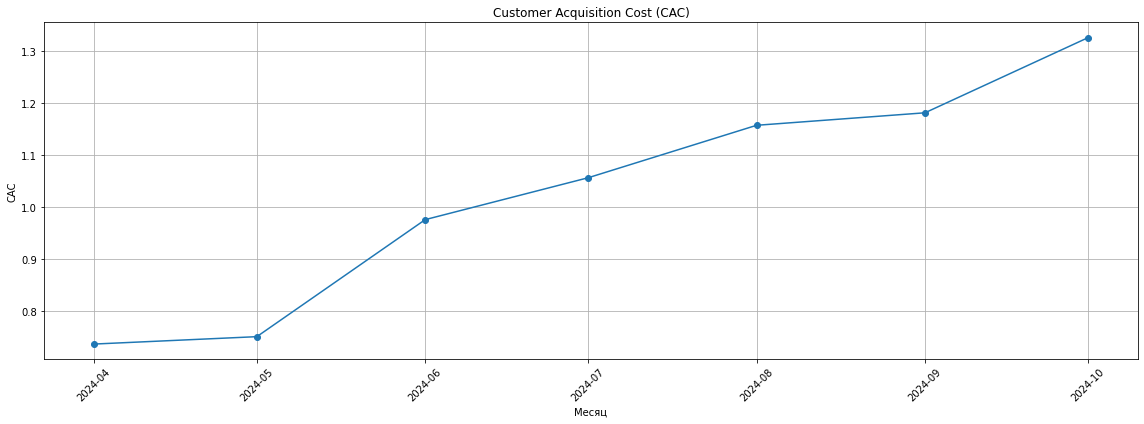

In [30]:
# Визуализация
plt.figure(figsize=(16, 6))

# CAC

plt.plot(cac_by_month['month'], cac_by_month['cac'], marker='o')
plt.title('Customer Acquisition Cost (CAC)')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Стоимость привлечения состаляет 0.75 в апреле-мае и растет к октябрю-ноябрю до 1.3, то есть затраты на привлечение увеличились примерно в 1.6-1.7 раза

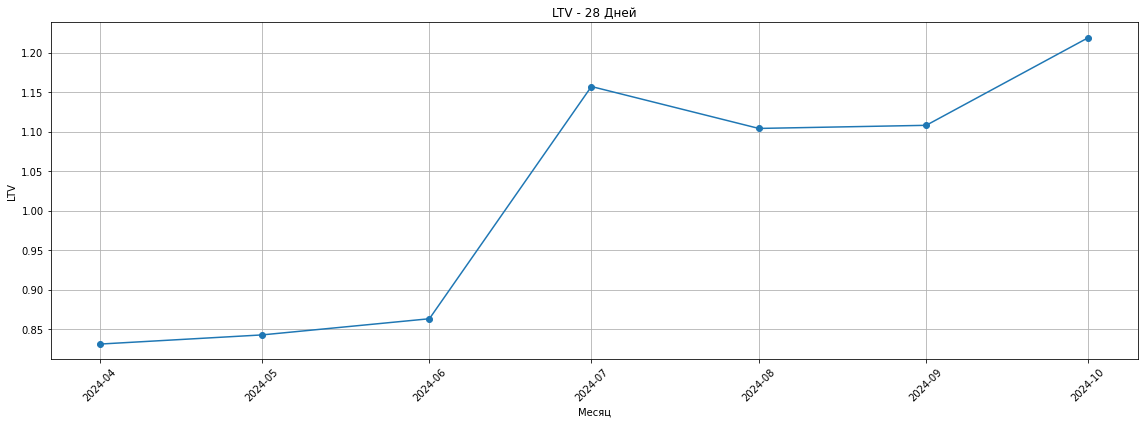

In [31]:
# LTV
plt.figure(figsize=(16, 6))
plt.plot(cohort_metrics['month'], cohort_metrics['ltv'], marker='o')
plt.title('LTV - 28 Дней')
plt.xlabel('Месяц')
plt.ylabel('LTV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

LTV в апреле-июне составляет 0.83-0.9, потом резкий рост в июле до 1.15, значения 1.10-1.20 до октября. 

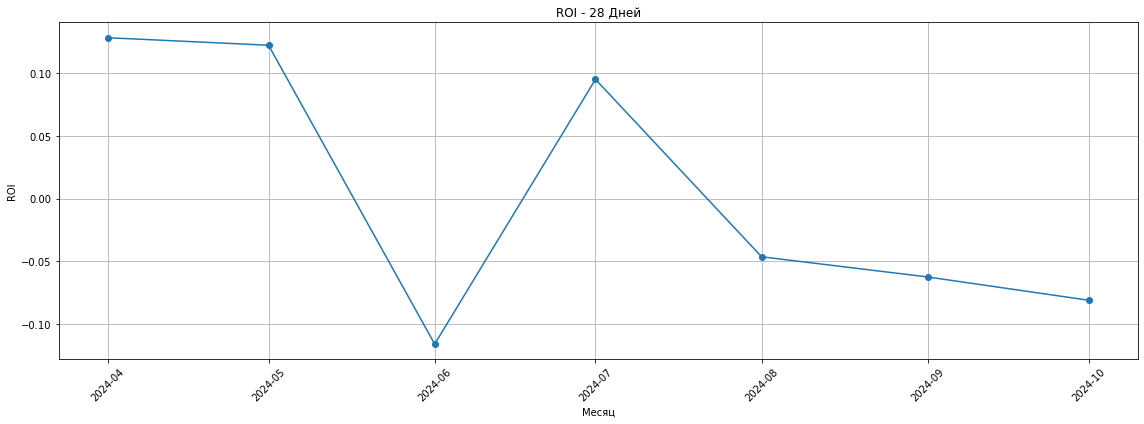

In [32]:
# ROI
plt.figure(figsize=(16, 6))

plt.plot(cohort_metrics['month'], cohort_metrics['roi'], marker='o')
plt.title('ROI - 28 Дней')
plt.xlabel('Месяц')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

В апреле-мае ROI был положительный, на уровне 0.12, потом в июне произошло падение до отрицательного значения (-0.1), далее рост к июлю до 0.1 и плавное понижение с августа до октября до -0.1.  Потом идет, как и в LTV резкое падение вниз к ноябрю, вероятно также из-за того, что последняя когорта не успела пройти "путь" в 28 дней.


    
<div class="alert alert-info"> <b>Комментарии студента V1:</b> Поправил. Честно говоря, думал, что можно и оставить с ноябрем) Но согласен, что график в таком случае сбивает сильно с толку.</div>

    
<div class="alert alert-info"> <b>Комментарии студента V1:</b> Поправил.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

По показателю ROI мы видим, что до изменения контента и стратегии привлечения маркетинговые расходы окупались, а после этого (в среднем) - окупаться перестали, за исключением июля, когда произошел резкий рост LTV.

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


Общее число привлеченных пользователей по источникам:
 channel
FaceBoom          24339
TipTop            15413
RocketSuperAds    12492
MediaTornado      12311
Name: user_id, dtype: int64


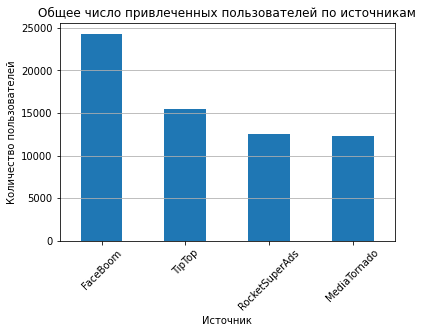

In [33]:
# Фильтрация profiles, чтобы исключить ноябрь и далее
profiles = profiles[profiles['first_dt'] <= pd.to_datetime('2024-10-31')]

# 1. Самые популярные источники привлечения

# Общее число привлеченных пользователей для каждого источника
user_counts_by_source = profiles.groupby('channel')['user_id'].nunique().sort_values(ascending=False)
print("Общее число привлеченных пользователей по источникам:\n", user_counts_by_source)

# Визуализация общего числа привлеченных пользователей
user_counts_by_source.plot(kind='bar')
plt.title('Общее число привлеченных пользователей по источникам')
plt.xlabel('Источник')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Лидирует по количеству FaceBoom, далее TipTop, примерно одинаковое количество у RocketSuperAds и MediaTornado.

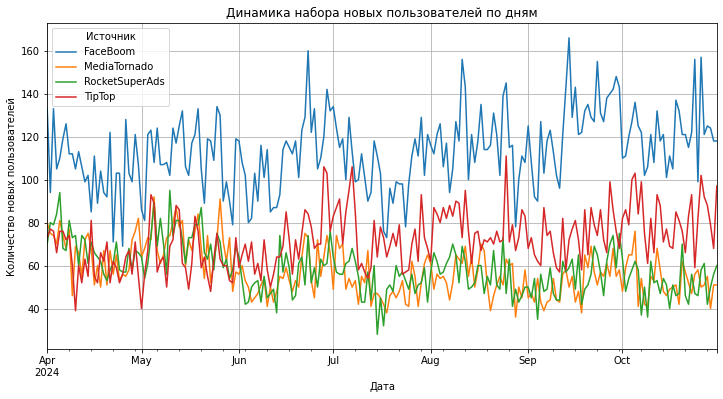

In [34]:


# Визуализация динамики набора новых пользователей по дням
daily_new_users = profiles.groupby(['first_dt', 'channel'])['user_id'].nunique().unstack()
daily_new_users = daily_new_users[daily_new_users.index <= '2024-10-31']
daily_new_users.plot(figsize=(12, 6))
plt.title('Динамика набора новых пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
plt.legend(title='Источник')
plt.grid(True)
plt.show()

У FaceBoom динамика примерно от 100-120 пользователей в начале, в редкие периоды доходила до 140-160 и опускалась до 80-100, но в целом стабильна. У TipTop поначалу в районе 60-80, местами опускалась до 40 и поднималась до 100. У  RocketSuperAds и MediaTornado в начале и середине 60-80, ближе к концу года опускалась до 40-60. Но в целом по кажому источнику наблюдается стабильность.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Правильное решение показать  обычную динамик, это поможет показать цикличность, а также изменения в наборе.

<Figure size 864x432 with 0 Axes>

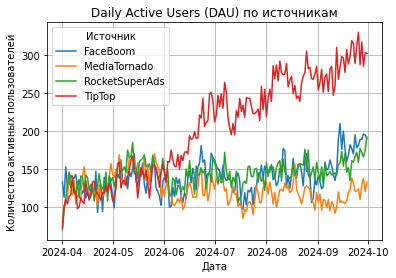

In [35]:
visits['session_start'] = pd.to_datetime(visits['session_start'])


# Рассчитываем DAU по источникам привлечения
dau_by_source = visits.groupby([visits['session_start'].dt.date, 'channel'])['user_id'].nunique().unstack().fillna(0)

# Применяем фильтр к DAU по дате
dau_by_source = dau_by_source[dau_by_source.index <= pd.to_datetime('2024-09-30').date()]

# Визуализация DAU
plt.figure(figsize=(12, 6))
dau_by_source.plot(kind='line')
plt.title('Daily Active Users (DAU) по источникам')
plt.xlabel('Дата')
plt.ylabel('Количество активных пользователей')
plt.legend(title='Источник')
plt.grid(True)
plt.show()



В DAU наиболее активный прирост у TipTop начался с июня-июля, в целом от 100-150 в мае до 350 в октябре. Вероятно, это из-за изменения в начале лета и спортивного контента. У FaceBoom небольшой рост от 100-150 до 200 к конце года. У  RocketSuperAds и MediaTornado картина стабильная, при этом у RocketSuperAds рост чуть более заметен, от 100-150 до 150-170.

<Figure size 864x432 with 0 Axes>

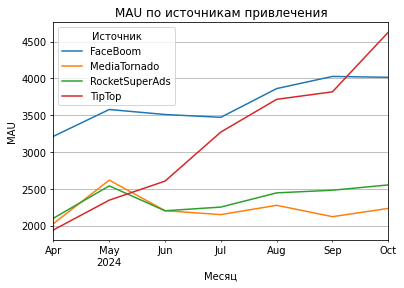

In [36]:
# Рассчитываем MAU по источникам привлечения
mau_by_source = visits.groupby([visits['session_start'].dt.to_period('M'), 'channel'])['user_id'].nunique().unstack().fillna(0)
# Конвертируем индекс в datetime для сравнения
mau_by_source.index = mau_by_source.index.to_timestamp()

# Применяем фильтр по дате
mau_by_source = mau_by_source[mau_by_source.index <= pd.to_datetime('2024-10-31')]
# Визуализация MAU
plt.figure(figsize=(12, 6))
mau_by_source.plot(kind='line')
plt.title('MAU по источникам привлечения')
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.legend(title='Источник')
plt.grid(True)
plt.show()

У TipTop самый существенный рост MAU (как и DAU в прошлом графике) - с 2000 в январе до 4700 к концу года. У Faceboom рост более плавный - с 3200 в начале до 4000 в конце года. RocketSuperAds и MediaTornado идут практически параллельно, чуть лучше у RocketSuperAds (с 2000 до 2500 к концу года). MediaTornado- с 2000 до 2300 к концу года.

Вероятно, самая большая доля нового контента пришлась на TipTop.

<Figure size 1008x432 with 0 Axes>

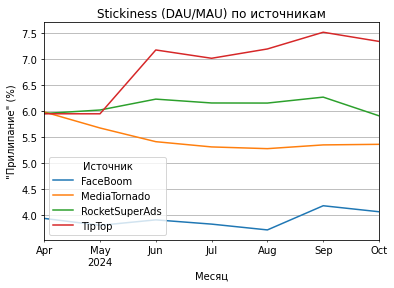

In [37]:
# Рассчитываем DAU по источникам привлечения
dau_by_source = visits.groupby([visits['session_start'].dt.date, 'channel'])['user_id'].nunique().unstack().fillna(0)

# Рассчитываем MAU по источникам привлечения
mau_by_source = visits.groupby([visits['session_start'].dt.to_period('M'), 'channel'])['user_id'].nunique().unstack().fillna(0)

# Конвертируем индекс MAU в datetime для фильтрации
mau_by_source.index = mau_by_source.index.to_timestamp()

# Фильтруем MAU по дате
mau_by_source = mau_by_source[mau_by_source.index <= pd.to_datetime('2024-10-31')]


# Рассчитываем Stickiness (DAU/MAU) по источникам
# Нужно привести DAU и MAU к одному периоду (месяцу)
# Для этого усредняем DAU по месяцам

# Конвертируем индекс DAU в datetime для группировки и усреднения
dau_by_source.index = pd.to_datetime(dau_by_source.index)

dau_monthly_avg = dau_by_source.groupby(dau_by_source.index.to_period('M')).mean()

# Конвертируем индекс dau_monthly_avg в datetime для фильтрации
dau_monthly_avg.index = dau_monthly_avg.index.to_timestamp()

# Фильтруем DAU по дате
dau_monthly_avg = dau_monthly_avg[dau_monthly_avg.index <= pd.to_datetime('2024-10-31')]



stickiness_by_source = (dau_monthly_avg / mau_by_source) * 100

# Визуализация Stickiness
plt.figure(figsize=(14, 6))
stickiness_by_source.plot(kind='line')
plt.title('Stickiness (DAU/MAU) по источникам')
plt.xlabel('Месяц')
plt.ylabel('"Прилипание" (%)')
plt.legend(title='Источник')
plt.grid(True)
plt.show()

У TipTop, SuperRocketAds и MediaTornado "прилипание" в апреле было по 6%, при этом у TipTop после июньских изменений стало 7.5% к октябрю, у SuperRocketAds стабильность в районе 6%, у MediaTornado плавный спад до 5.2-5.5%. У FaceBoom "прилипание" было 3.9% в апреле, потом до октября колебания в районе 3.7-4.2%

    
<div class="alert alert-info"> <b>Комментарии студента V1:</b> Добавил, это моя невнимательность.</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__


Стоит обратить внимание на TipTop — несмотря на то что пользователей там меньше, чем у FaceBoom, они заметно активнее: это видно по высоким значениям DAU и Stickiness. Скорее всего, этот канал приводит более заинтересованную аудиторию.

    
У FaceBoom ситуация противоположная: по MAU видно, что пользователей много, но DAU и Stickiness остаются низкими. Такое ощущение, что люди приходят, но почти не возвращаются — возможно, канал даёт менее вовлечённый трафик.


    
</div>

In [38]:
# Задаем текущую дату как 31 октября 2024
today = pd.to_datetime('2024-10-31')

# Преобразуем numpy.datetime64 в datetime
today_datetime = today.to_pydatetime()

# 2. Определение недельной когорты
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').dt.to_timestamp()
visits['cohort_week'] = visits['first_dt'].dt.to_period('W').dt.to_timestamp()
orders['cohort_week'] = orders['first_dt'].dt.to_period('W').dt.to_timestamp()
mk_costs['cohort_week'] = mk_costs['dt'].dt.to_period('W').dt.to_timestamp()
cohort_sizes = profiles.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
cohort_sizes.rename(columns={'user_id': 'cohort_users'}, inplace=True)

In [39]:

date_before_28 = today - pd.Timedelta(days=28)

# Находим начало последней полной недели, заканчивающейся до этой даты.
# Делаем 'W-SUN', чтобы неделя заканчивалась в воскресенье.
last_full_week_for_28 = pd.to_datetime(date_before_28.to_period('W-SUN').start_time)

# Фильтруем размеры когорт
cohort_sizes_filtered = cohort_sizes[cohort_sizes['cohort_week'] <= last_full_week_for_28].copy()

cohort_sizes_filtered.head()

,cohort_week,first_channel,cohort_users
0,2024-04-01,FaceBoom,820
1,2024-04-01,MediaTornado,522
2,2024-04-01,RocketSuperAds,542
3,2024-04-01,TipTop,516
4,2024-04-08,FaceBoom,749


In [40]:
# Фильтрация когорт для удержания
active_14_28 = visits[(visits['lifetime'] >= 14) & (visits['lifetime'] < 28) & (visits['session_start'] <= today_datetime.strftime('%Y-%m-%d'))].copy()
retained_14_28 = active_14_28.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
retained_14_28.rename(columns={'user_id': 'retained_users_14_28'}, inplace=True)
roll_retention = cohort_sizes_filtered.merge(retained_14_28, on=['cohort_week', 'first_channel'], how='left')
roll_retention['retained_users_14_28'] = roll_retention['retained_users_14_28'].fillna(0)

roll_retention['roll_retention_14_28'] = (
    roll_retention['retained_users_14_28'] / roll_retention['cohort_users']
) * 100
roll_retention.head()


,cohort_week,first_channel,cohort_users,retained_users_14_28,roll_retention_14_28
0,2024-04-01,FaceBoom,820,10,1.219512
1,2024-04-01,MediaTornado,522,48,9.195402
2,2024-04-01,RocketSuperAds,542,67,12.361624
3,2024-04-01,TipTop,516,66,12.790698
4,2024-04-08,FaceBoom,749,10,1.335113


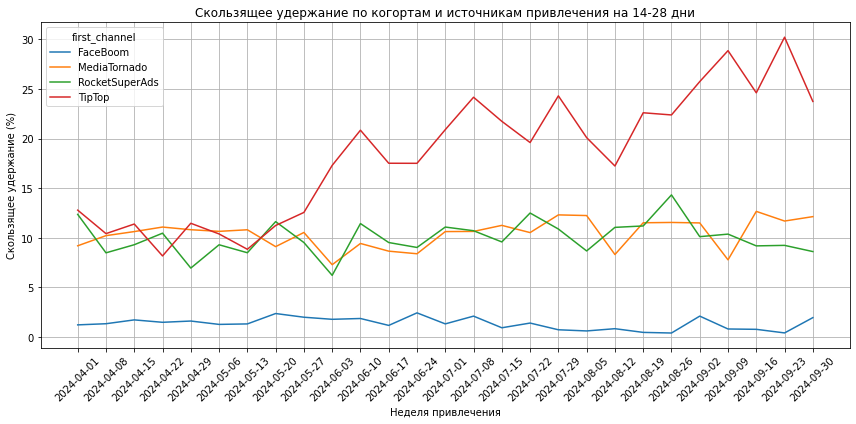

In [41]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohort_week', y='roll_retention_14_28', hue='first_channel', data=roll_retention)
plt.title('Скользящее удержание по когортам и источникам привлечения на 14-28 дни')
plt.xlabel('Неделя привлечения')
plt.ylabel('Скользящее удержание (%)')
plt.grid()

# Улучшение меток оси X
cohort_weeks_unique = sorted(roll_retention['cohort_week'].unique())
plt.xticks(cohort_weeks_unique, [pd.Timestamp(cw).to_pydatetime().strftime('%Y-%m-%d') for cw in cohort_weeks_unique], rotation=45)
plt.tight_layout()  # чтобы метки не обрезались

plt.show()

Самое высокое удержание у TipTop из-за летних изменений, рост от 10-12% до 25-30% к концу года.  RocketSuperAds и MediaTornado идут практически параллельно, удержание 7-12% по году. У FaceBoom очень низкая цифра, существенно ниже остальных, 1-2%.

В последний месяц у всех резкое падение, так как не прошло 14-28 дней с начала старта.

    
<div class="alert alert-info"> <b>Комментарии студента V1:</b> Поправил.</div>

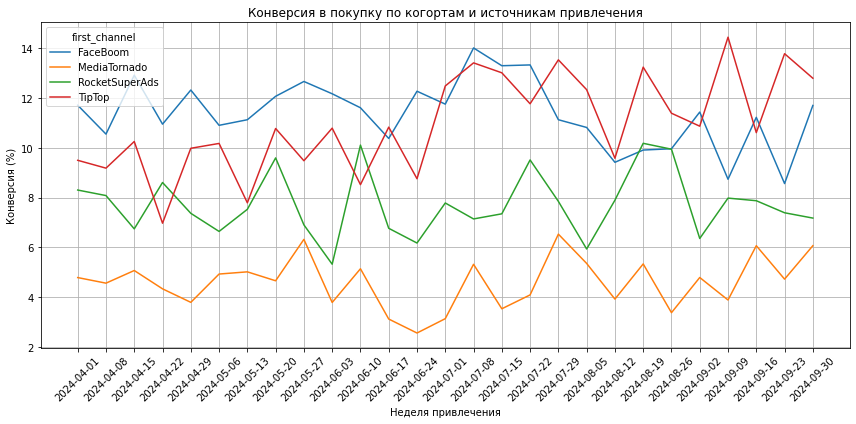

In [42]:
# Конверсия в покупку
orders_filtered_date = orders[orders['event_dt'] <= '2024-11-30'].copy()

purchasers = orders_filtered_date.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
purchasers.rename(columns={'user_id': 'purchase_users'}, inplace=True)

conversion_to_purchase = cohort_sizes_filtered.merge(purchasers, on=['cohort_week', 'first_channel'], how='left')
conversion_to_purchase['purchase_users'] = conversion_to_purchase['purchase_users'].fillna(0)

conversion_to_purchase['conversion_rate'] = (
    conversion_to_purchase['purchase_users'] / conversion_to_purchase['cohort_users']) * 100

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohort_week', y='conversion_rate', hue='first_channel', data=conversion_to_purchase)
plt.title('Конверсия в покупку по когортам и источникам привлечения')
plt.xlabel('Неделя привлечения')
plt.ylabel('Конверсия (%)')
plt.grid()
plt.xticks(rotation=45) #
cohort_weeks_unique = sorted(conversion_to_purchase['cohort_week'].unique()) # Исправлено - берём из conversion_to_purchase
plt.xticks(cohort_weeks_unique, [pd.Timestamp(cw).to_pydatetime().strftime('%Y-%m-%d') for cw in cohort_weeks_unique])
plt.tight_layout()
plt.show()

Самый высокий рост конверсии у TipTop, 8-10% в апреле-мае и 12-15% к концу года. У FaceBoom снижение конверсии с 11-13% в начале до 8-10% в конце. RocketSuperAds 7-10% в течение года без резких всплесков и MediaTornado (3-6%) в течение года.


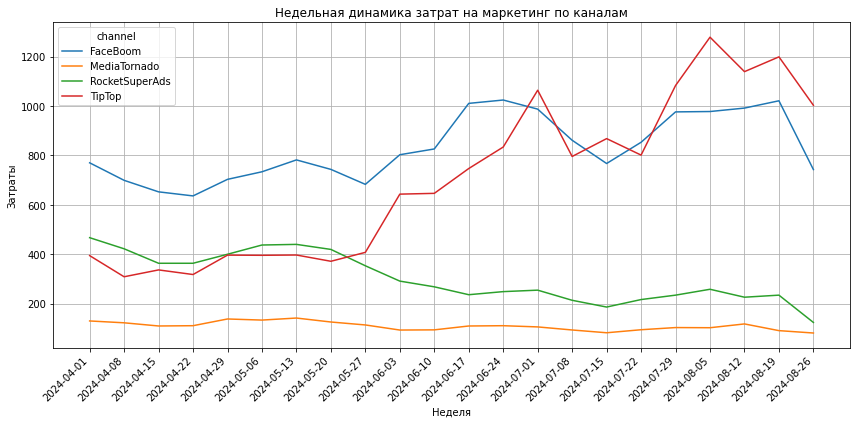

In [52]:
# Недельная динамика затрат на маркетинг
mk_costs['cohort_week'] = mk_costs['dt'].dt.to_period('W').dt.to_timestamp() # Преобразование для правильного cohort_week
costs_filtered_date = mk_costs[mk_costs['dt'] <= '2024-08-31'].copy()


weekly_costs = costs_filtered_date.groupby(['cohort_week', 'channel'])['costs'].sum().reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohort_week', y='costs', hue='channel', data=weekly_costs)
plt.title('Недельная динамика затрат на маркетинг по каналам')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.grid()
plt.xticks(rotation=45)

# Исправляем получение cohort_weeks_unique и форматирование даты
cohort_weeks_unique = sorted(weekly_costs['cohort_week'].unique())
plt.xticks(cohort_weeks_unique, [pd.Timestamp(cw).to_pydatetime().strftime('%Y-%m-%d') for cw in cohort_weeks_unique], rotation=45, ha='right')

plt.tight_layout()
plt.show()

Самые высокие затраты оказались у TipTop рост в несколько раз от 300 до 1900 к концу года, ниже рост у Faceboom с 750 до 1100. При этом у RocketSuperAds снижение с 500 до 200, у MediaTornado стабильно малые вложения в районе 100-150

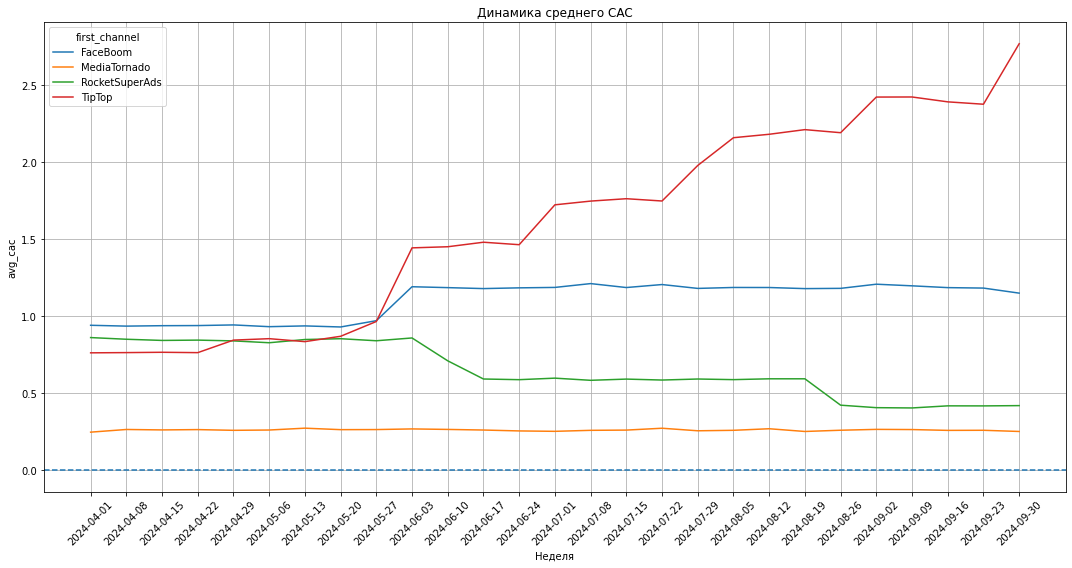

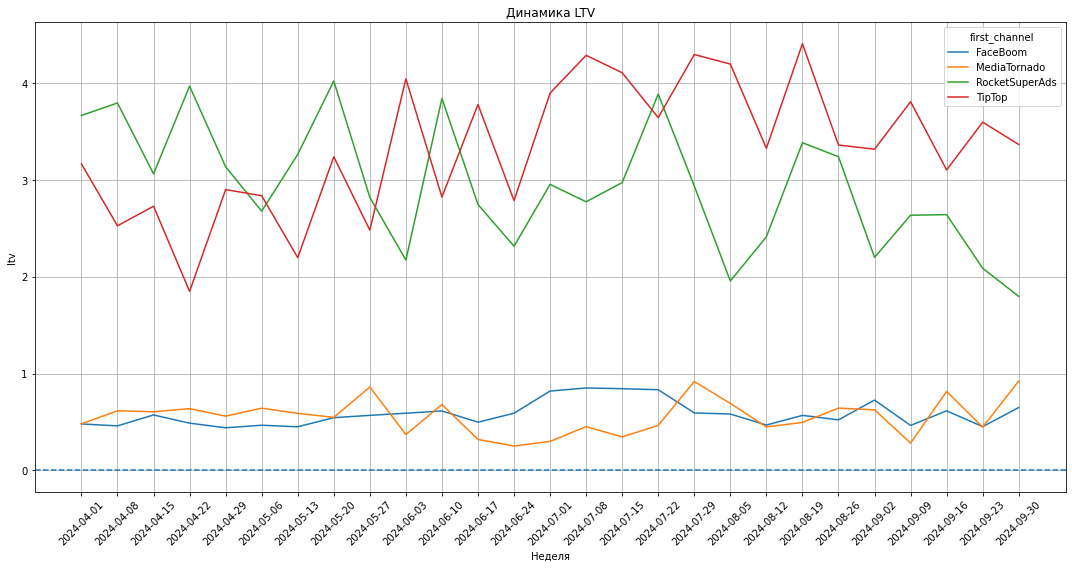

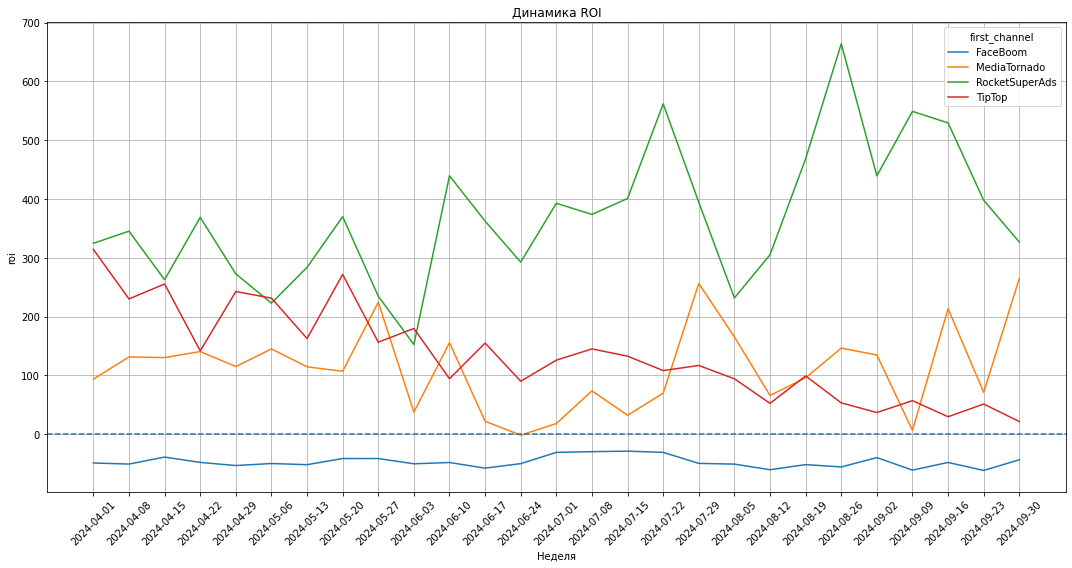

In [44]:
# Ставим дату, чтобы ноябрь не был включен
analysis_date = pd.to_datetime('2024-10-31')

# Создаем когорту по неделям
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').apply(lambda r: r.start_time)

# Группируем по когортам и каналам, считаем пользователей и сумму CAC
metrics = profiles.groupby(['cohort_week', 'first_channel']).agg(
    total_users=('user_id', 'nunique'),
    total_cac=('cac', 'sum')
).reset_index()

# Суммируем доход по когортам и каналам
revenue_w = orders.groupby(['cohort_week', 'first_channel'])['revenue'].sum().reset_index()

# Объединяем метрики с доходами
metrics = pd.merge(metrics, revenue_w, on=['cohort_week', 'first_channel'], how='left')
metrics['revenue'] = metrics['revenue'].fillna(0)

# Рассчитываем показатели
metrics['avg_cac'] = metrics['total_cac'] / metrics['total_users']

metrics['ltv'] = metrics['revenue'] / metrics['total_users']

# Пересчитываем ROI с использованием скорректированного 'total_cac'
metrics['roi'] = ((metrics['ltv'] - metrics['avg_cac']) / metrics['avg_cac']) * 100

# Добавляем фильтр: оставляем только когорты, у которых прошло >= 28 дней до analysis_date
metrics['days_since_cohort'] = (analysis_date - metrics['cohort_week']).dt.days
metrics_filtered = metrics[metrics['days_since_cohort'] >= 28]

# Визуализация
plot = ['avg_cac', 'ltv', 'roi']
titles = ['Динамика среднего CAC', 'Динамика LTV', 'Динамика ROI']

for metric, title in zip(plot, titles):
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='cohort_week', y=metric, hue='first_channel', data=metrics_filtered)
    plt.title(title)
    plt.xlabel('Неделя')
    plt.ylabel(metric)

    # Добавление меток для когортных недель
    cohort_weeks_unique = sorted(metrics_filtered['cohort_week'].unique())
    # Преобразуем numpy.datetime64 в datetime для форматирования
    formatted_labels = [pd.to_datetime(cw).strftime('%Y-%m-%d') for cw in cohort_weeks_unique]
    plt.xticks(cohort_weeks_unique, formatted_labels, rotation=45)

    plt.grid(True)
    plt.tight_layout()
    plt.axhline(y=0, linestyle='--')
    plt.show()

<div class="alert alert-info"> <b>Комментарии студента V1:</b>  Разбивку по неделям добавил. </div>

 Средний CAC увеличился по TipTop с 0.7 до 2.9, рост начался в июне с новым траффиком. У Faceboom увеличение незначительное с 0.9 до 1.2. У RocketSuperAds падение с 0.8 до 0.4, началось после июня. У MediaTornado стабильно низкие вложения в районе 0.25.

По LTV рост обозначен у TipTop, с 2.5 до 3-4 к концу года. У RocketSuperAds шло плавное падение LTV с 3-3.5 до 2-3. У FaceBoom и MediaTornado среднее LTV в районе 0.4-0.8 в течение всего срока.

По среднему ROI отрицательное значение у FaceBoom из-за низкого LTV и увеличения затрат CAC. У TipTop рост вложений опережал рост LTV, поэтому наблюдается тренд к снижению ROI v июня. MediaTornado показывает скачки, но в целом тренд стабильный, у RocketSuperAds наблюдается рост, так как снижение вложений было выше, чем снижение дохода LTV.

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

In [45]:
# Создаем цветовую карту
cmap_roi = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

# Анализ периода окупаемости маркетинговых вложений
orders['order_week'] = orders['event_dt'].dt.to_period('W').dt.to_timestamp()
orders['first_week'] = orders['first_dt'].dt.to_period('W').dt.to_timestamp()

orders['N_week'] = ((orders['order_week'] - orders['first_week']).dt.days / 7).astype(int)

max_weeks = 9 # Анализируем до 9 недель (0-8)
orders_filtered_lifetime = orders[orders['N_week'] < max_weeks] 

In [46]:
cum_revenue_raw = orders_filtered_lifetime.groupby(['first_week', 'first_channel', 'N_week'])['revenue'].sum().reset_index()
cum_revenue_raw.rename(columns={'first_week': 'cohort_week', 'first_channel': 'channel'}, inplace=True)

all_cohort_weeks = profiles['first_dt'].dt.to_period('W').dt.to_timestamp().unique()
all_channels = profiles['first_channel'].unique()
all_lifetime_weeks = pd.RangeIndex(stop=max_weeks)

full = pd.MultiIndex.from_product([all_cohort_weeks, all_channels, all_lifetime_weeks],
                                        names=['cohort_week', 'channel', 'N_week']).to_frame(index=False)

In [47]:


# Объединяем с фактическими данными о доходе.
revenue_data_for_cum = full.merge(cum_revenue_raw, on=['cohort_week', 'channel', 'N_week'], how='left')
revenue_data_for_cum = revenue_data_for_cum.sort_values(by=['cohort_week', 'channel', 'N_week'])

# Для расчета кумулятивного дохода, заполняем NaN в 'revenue' нулями
revenue_data_for_cum['cumulative_revenue'] = revenue_data_for_cum.groupby(['cohort_week', 'channel'])['revenue'].cumsum()
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').dt.start_time
cohort_sizes = profiles.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
cohort_sizes.rename(columns={'user_id': 'cohort_users', 'first_channel': 'channel'}, inplace=True)

In [48]:
# Объединяем данные о доходе с размерами когорт
cumulative_ltv = revenue_data_for_cum.merge(cohort_sizes, on=['cohort_week', 'channel'], how='left')
cumulative_ltv['cumulative_ltv'] = cumulative_ltv['cumulative_revenue'] / cumulative_ltv['cohort_users']

weekly_costs = mk_costs.groupby(['cohort_week', 'channel'])['costs'].sum().reset_index()
new_users_weekly = profiles.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index()
new_users_weekly.rename(columns={'user_id': 'new_users_count', 'first_channel': 'channel'}, inplace=True)

cac_df = weekly_costs.merge(new_users_weekly, on=['cohort_week', 'channel'], how='left')
cac_df['cac'] = cac_df['costs'] / cac_df['new_users_count']
cac_df['cac'] = cac_df['cac'].replace([float('inf'), -float('inf')], pd.NA) 

In [49]:
# Cписок каналов для анализа
channels_for_payback = ['FaceBoom', 'MediaTornado', 'TipTop', 'RocketSuperAds'] 

# Объединяем данные LTV и CAC для расчета ROI
roi_long_term = cumulative_ltv.merge(cac_df[['cohort_week', 'channel', 'cac']], on=['cohort_week', 'channel'], how='left')

# Расчет Кумулятивного ROI
roi_long_term['cumulative_roi'] = ((roi_long_term['cumulative_ltv'] - roi_long_term['cac']) / roi_long_term['cac']) * 100
roi_long_term['cumulative_roi'] = roi_long_term['cumulative_roi'].replace([float('inf'), -float('inf')], pd.NA)

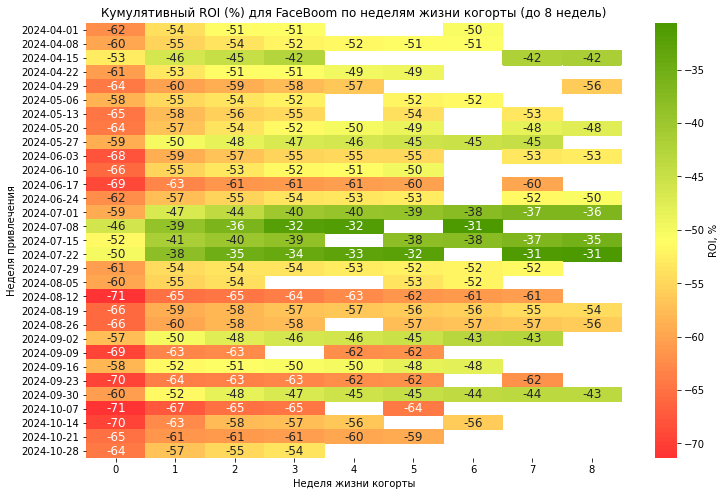

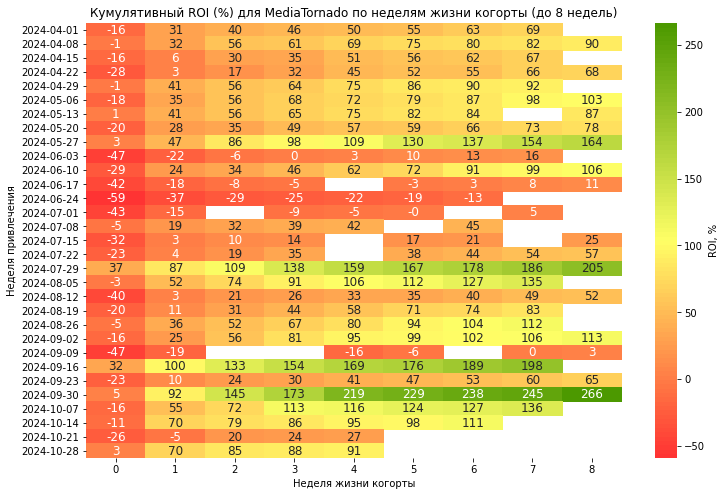

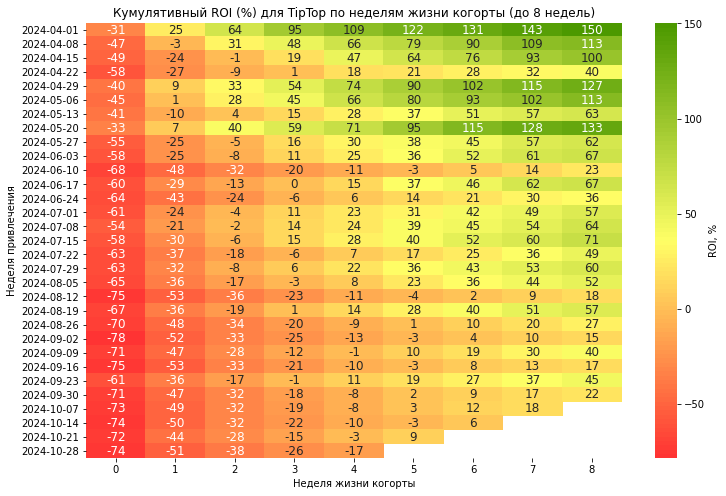

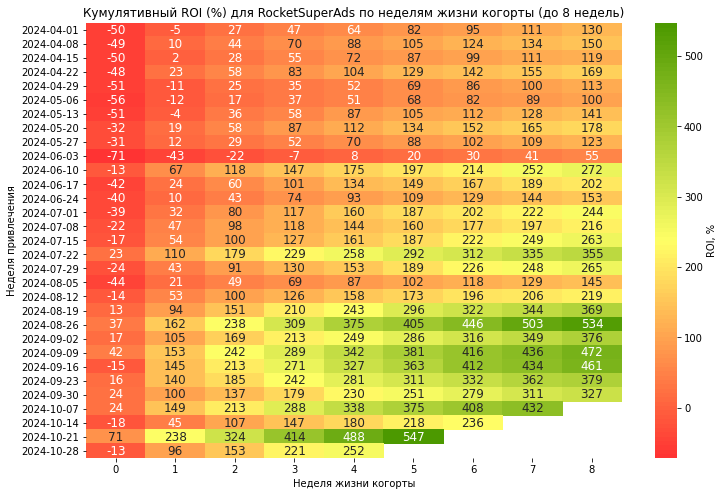

In [50]:
# Построение тепловых карт
roi_long_term_filtered = roi_long_term[
    (roi_long_term['channel'].isin(channels_for_payback)) &
    (roi_long_term['cac'].notna() | roi_long_term['cumulative_ltv'].notna()) 
].copy()

roi_long_term_filtered['cohort_week_short'] = roi_long_term_filtered['cohort_week'].dt.strftime('%Y-%m-%d')
for channel in channels_for_payback:
    channel_data = roi_long_term_filtered[roi_long_term_filtered['channel'] == channel].copy()    
   
    # Подготовка данных для тепловой карты: pivot table
    # Здесь NaN значения уже должны быть там, где нет данных
    heatmap_data = channel_data.pivot_table(
        index='cohort_week_short',
        columns='N_week',
        values='cumulative_roi'
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        cmap=cmap_roi,
        annot=True,
        fmt=".0f",
        annot_kws={"size": 12},
        cbar_kws={'label': 'ROI, %'},
        mask=heatmap_data.isna() 
    )
    plt.title(f'Кумулятивный ROI (%) для {channel} по неделям жизни когорты (до {max_weeks-1} недель)')
    plt.xlabel('Неделя жизни когорты')
    plt.ylabel('Неделя привлечения')
    plt.xticks()
    plt.yticks(rotation=0)
    plt.show()

В FaceBoom ROI стабильно отрицательный на протяжении всех когорт, нет роста. Это из-за крайне низкого LTV и некбольшого увеличения CAC.

В MediaTornado окупаемость идет практически сразу, за исключением июньских когорт, когда было привлечение нового контента.

В TipTop окупаемость в апреле-мае была в 1-2 неделю, потом из-за активного привлечения контента и сильного увеличения затрат окупаемость наступала на 3-4 неделе в июне-августе, а осенью на 4-5 неделе. То есть рост LTV "не успевал" за ростом CAC.

В RocketSuperAds окупаемость была на 1-2 неделе, при этом в более поздних когортах величина ROI существенно росла, так как затраты уменьшались, а доходы росли.


## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


Выводы:

По всем данным DAU, MAU и Stickiness растут от месяца к месяцу стабильно.

Стоимость привлечения CAC состаляет 0.75 в апреле-мае и растет к октябрю-ноябрю до 1.3, то есть затраты на привлечение увеличились примерно в 1.6-1.7 раза. LTV в апреле-июне составляет 0.83-0.9, потом резкий рост в июле до 1.15, значения 1.10-1.20 до октября, здесь рост в 1.2-1.4 раза, это медленнее LTV. В апреле-мае ROI был положительный, на уровне 0.12, потом в июне произошло падение до отрицательного значения (-0.1), далее рост к июлю до 0.1 и плавное понижение с августа до октября до -0.1.  Летом произошло снижение ROI вероятно из-за нового спортивного контента, так как затраты резко увеличились именно в июне, а LTV начал рост с июля, причем рост LTV происходил медленнее, чем рост затрат.


Динамика набора новых пользователей стабильна у всех источников. Самый высокий рост DAU, MAU, Stickiness оказался у источника TipTop, это произошло летом из-за привлечения нового контента. Причем увеличение показателей было как раз с июня. 

Самое высокое скользящее удержание у TipTop из-за летних изменений, рост от 10-12% до 25-30% к концу года.  RocketSuperAds и MediaTornado идут практически параллельно, удержание 7-12% по году. У FaceBoom очень низкая цифра, существенно ниже остальных, 1-2%. На это стоит бизнесу обратить внимание дополнительно.

Самый высокий рост конверсии у TipTop, 8-10% в апреле-мае и 12-15% к концу года. У FaceBoom снижение конверсии с 11-13% в начале до 8-10% в конце. RocketSuperAds 7-10% в течение года без резких всплесков и MediaTornado (3-6%) в течение года.

Самые высокие затраты оказались у TipTop рост в несколько раз от 300 до 1900 к концу года, ниже рост у Faceboom с 750 до 1100. При этом у RocketSuperAds снижение с 500 до 200, у MediaTornado стабильно малые вложения в районе 100-150

Средний CAC увеличился по TipTop с 0.7 до 2.9, рост начался в июне с новым траффиком. У Faceboom увеличение незначительное с 0.9 до 1.2. У RocketSuperAds падение с 0.8 до 0.4, началось после июня. У MediaTornado стабильно низкие вложения в районе 0.25.

По LTV рост обозначен у TipTop, с 2.5 до 3-4 к концу года. У RocketSuperAds шло плавное падение LTV с 3-3.5 до 2-3. У FaceBoom и MediaTornado среднее LTV в районе 0.4-0.8 в течение всего срока.

По среднему ROI отрицательное значение у FaceBoom из-за низкого LTV и увеличения затрат CAC. У TipTop рост вложений опережал рост LTV, поэтому наблюдается тренд к снижению ROI v июня. MediaTornado показывает скачки, но в целом тренд стабильный, у RocketSuperAds наблюдается рост, так как снижение вложений было выше, чем снижение дохода LTV.

В FaceBoom ROI стабильно отрицательный на протяжении всех когорт, нет роста. Это из-за крайне низкого LTV и некбольшого увеличения CAC.

В MediaTornado окупаемость идет практически сразу, за исключением июньских когорт, когда было привлечение нового контента.

В TipTop окупаемость в апреле-мае была в 1-2 неделю, потом из-за активного привлечения контента и сильного увеличения затрат окупаемость наступала на 3-4 неделе в июне-августе, а осенью на 4-5 неделе. То есть рост LTV "не успевал" за ростом CAC.

В RocketSuperAds окупаемость была на 1-2 неделе, при этом в более поздних когортах величина ROI существенно росла, так как затраты уменьшались, а доходы росли.


Из рекомендаций стоит обратить внимание на FaceBoom с отрицательным ROI, а также дополнительно изучить показатели TipTop по части затрат и дохода. Очевидно, это это принесло новый контент, однако ROI стал падать ближе к концу года. По MediaTornado и RocketSuperAds ситуация в целом стабильна.